## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.np_utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping
import tensorflow as tf
""""
將 monitor 設定為監控 validation Accuracy

參數說明：
patience: 經過多少epochs後仍然沒有改善模型效能時停止訓練。
verbose: 運作狀況

使用說明：先定義出 Early stopping 的規則，再放入模型訓練中。
"""
results = {}
Patience = [10,25]
for i in Patience:
    earlystop = EarlyStopping(monitor='val_accuracy',
                          patience=i,
                          verbose=1
                          )
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tf.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "Patience: %s" %(str(i))
    results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896 

C:\Users\TB890239\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
49/49 [==============================] - 5s 92ms/step - loss: 2.1997 - accuracy: 0.2743 - val_loss: 2.1566 - val_accuracy: 0.2003
Epoch 2/50
49/49 [==============================] - 5s 96ms/step - loss: 1.7428 - accuracy: 0.3977 - val_loss: 1.9819 - val_accuracy: 0.2929
Epoch 3/50
49/49 [==============================] - 4s 90ms/step - loss: 1.6124 - accuracy: 0.4388 - val_loss: 1.8328 - val_accuracy: 0.3651
Epoch 4/50
49/49 [==============================] - 5s 94ms/step - loss: 1.5352 - accuracy: 0.4634 - val_loss: 1.7250 - val_accuracy: 0.3979
Epoch 5/50
49/49 [==============================] - 5s 98ms/step - loss: 1.4798 - accuracy: 0.4838 - val_loss: 1.6589 - val_accuracy: 0.4150
Epoch 6/50
49/49 [==============================] - 5s 97ms/step - loss: 1.4347 - accuracy: 0.4996 - val_loss: 1.5840 - val_accuracy: 0.4418
Epoch 7/50
49/49 [==============================] - 4s 88ms/step - loss: 1.3935 - accuracy: 0.5141 - val_loss: 1.5534 - val_accuracy: 0.4530
Epoch 8/50
49

Epoch 7/50
49/49 [==============================] - 4s 85ms/step - loss: 1.3987 - accuracy: 0.5126 - val_loss: 1.5473 - val_accuracy: 0.4567
Epoch 8/50
49/49 [==============================] - 4s 86ms/step - loss: 1.3621 - accuracy: 0.5252 - val_loss: 1.5220 - val_accuracy: 0.4600
Epoch 9/50
49/49 [==============================] - 4s 85ms/step - loss: 1.3307 - accuracy: 0.5376 - val_loss: 1.5013 - val_accuracy: 0.4710
Epoch 10/50
49/49 [==============================] - 4s 90ms/step - loss: 1.3005 - accuracy: 0.5498 - val_loss: 1.4886 - val_accuracy: 0.4729
Epoch 11/50
49/49 [==============================] - 4s 85ms/step - loss: 1.2716 - accuracy: 0.5593 - val_loss: 1.4716 - val_accuracy: 0.4774
Epoch 12/50
49/49 [==============================] - 4s 81ms/step - loss: 1.2453 - accuracy: 0.5693 - val_loss: 1.4728 - val_accuracy: 0.4774
Epoch 13/50
49/49 [==============================] - 4s 82ms/step - loss: 1.2189 - accuracy: 0.5778 - val_loss: 1.4667 - val_accuracy: 0.4854
Epoch 14/

'Code Here\n撰寫你的訓練流程並將結果用 dictionary 紀錄\n'

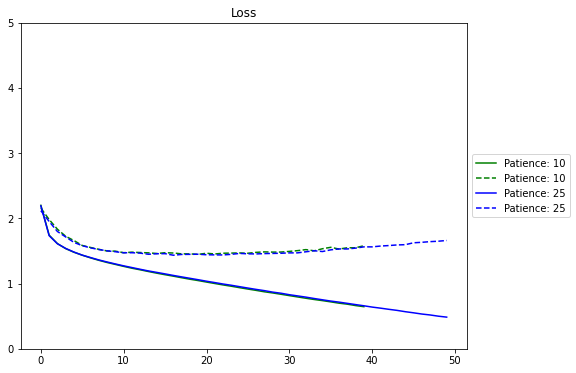

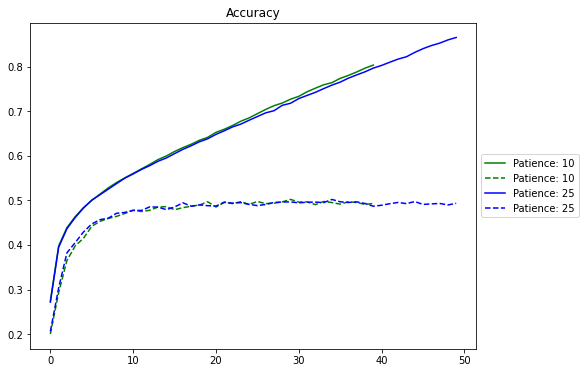

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [ 'g','b','y','r']
"""Code Here
將結果繪出
"""

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

1.監控參數改成"val_accuracy"後，訓練到第25次才Early stop，但訓練整體趨勢與數值都是一致的，可能使用這兩者沒有太大區別。

2.調整 earlystop 的等待次數至 10, 25 並比較結果 : 等待次數10到了第40次訓練時就停了，等待25次則等不到,完全訓練完，不過可以觀察到提早停確實能防止Overfitting繼續擴大（但確實沒辦法讓模型變好）可以設一個合理的等待次數，提早阻止Overfitting。